In [60]:
library(igraph)

## Generating Random Networks

## 2. Create networks using preferential attachment model

### a b c d

In [61]:
##check if its simple_pa
set.seed(12345)
mval = 5

connected_cnt=0 
for(i in 1:1000){
    g = barabasi.game(1000, m=mval, directed=F)
    if(is.connected(g)){
        connected_cnt = connected_cnt +1
    }
}
cat("isConnected probability",connected_cnt/1000,"\n")

isConnected probability 1 


In [62]:
set.seed(12345)
g = barabasi.game(1000, m=mval, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)
set.seed(12345)
g = barabasi.game(10000, m=mval, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)

[1] 0.2772562

[1] 0.2737901

$continuous
[1] TRUE

$alpha
[1] 1.511238

$xmin
[1] 9e-04

$logLik
[1] 128.674

$KS.stat
[1] 0.08711787

$KS.p
[1] 0.9286656

[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“229 y values <= 0 omitted from logarithmic plot”

[1] 1000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”

$continuous
[1] TRUE

$alpha
[1] 1.659138

$xmin
[1] 0.005

$logLik
[1] 47.28721

$KS.stat
[1] 0.1427042

$KS.p
[1] 0.7858656



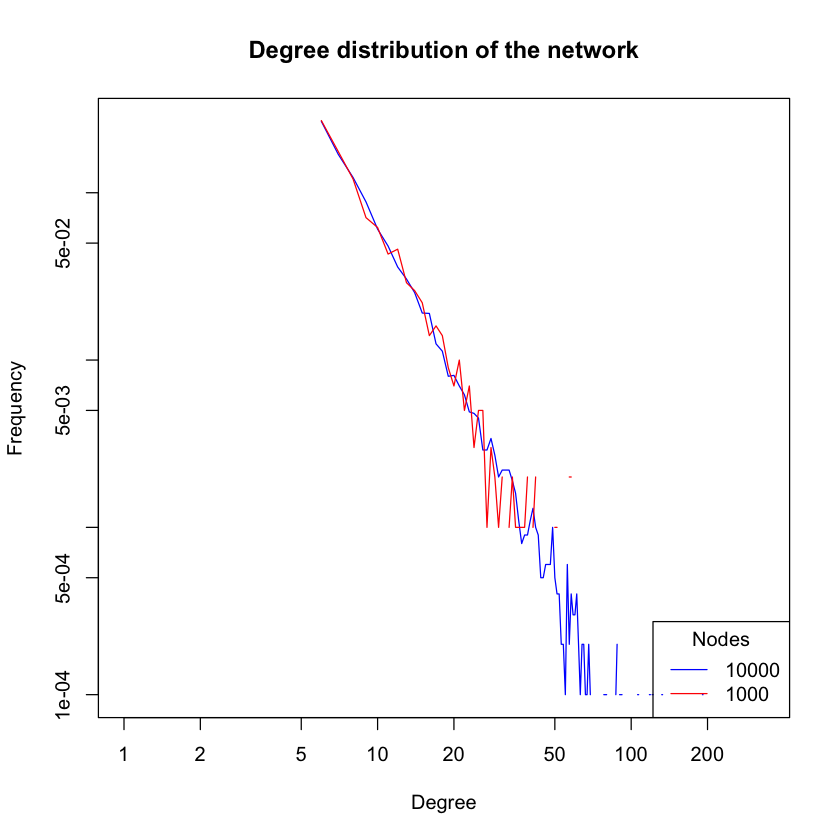

In [79]:
set.seed(234)
g = barabasi.game(10000, m=mval, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
print(fit_power_law(degree.distribution(g)))

g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
plot(col='blue',degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy',type='l')
g = barabasi.game(1000, m=mval, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
lines(col='red',degree.distribution(g),xlab="Degree",ylab="Frequency",log='xy',type='l')
legend("bottomright",title="Nodes", legend=c(10000,1000),col=c('blue','red'), lwd=1)
print(fit_power_law(degree.distribution(g)))


   [1] 11 11 10 11  8 11  8 10  3  8 10  8  3  8 11 11 11 10 11  8  3  8 11 11
  [25] 11 11  8 10  8  3 10  8  3 11  8  3  8  3 11  8  3 10  8 10 10 10 11  8
  [49]  8 10  8 11 11 10  8 10 11 11 10  3  8  3  7  8 11  8 10 10  3  3 10  8
  [73] 11  7 11 11  2 10  3  3  8 11  7 11 11  8  6 11  8 11 11  5 11 11  8  3
  [97] 10  3 11  2  8  8  7  6  3 11 11 10  8 10 11 10 10 10 11  3 10 11 10  3
 [121]  7  3 11 10  3  8  3  8  3  8  3  3 11  3  8  8  3  8 11  8 10  8  8  6
 [145] 11  8 11  5 11 11 10 11 11  3 11  3  7  2 11 11  2 10  7  8 10  3  3  8
 [169] 10  8  1  8 10  3  8  7  8 10 11  8 11 11 10 11 11 10  8 10 10  2  8  3
 [193]  3 11  3 11 10 11 10  8 10  3 10  1  3  8  2  8  3 10  7  8  2  7  3  8
 [217] 11  3 11 11  1  2  3 10  8  8 10 10 10 10  3 11  7 10  3  2 10 11  3  3
 [241]  4  8  7 10  8  3 10 11  3  8 10 11  8 11 11  8  3  3  7  4  3  8  2  3
 [265] 11 11 10  6  7 10 10  8 10  2  3  8 11 11  2 10  3 10  6  8  9  6 11  8
 [289] 11  3 11  8  8 11  3  1  2  2 10  8 11 10 11 

Community sizes
  1   2   3   4   5   6   7   8   9  10  11 
 30  84 180  12  30  35  62 196   7 175 189 

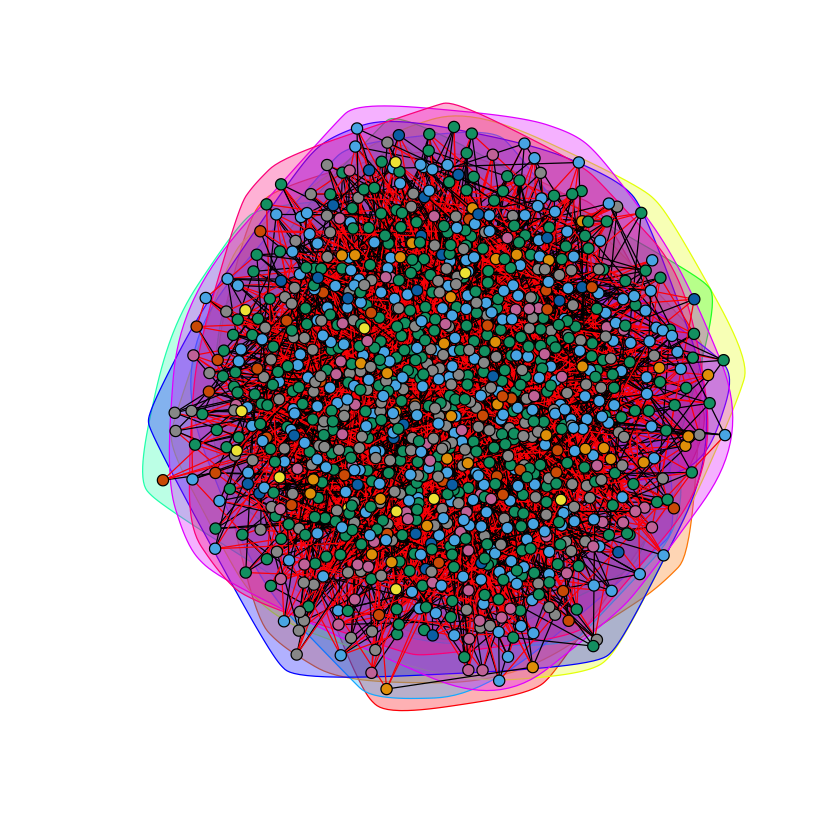

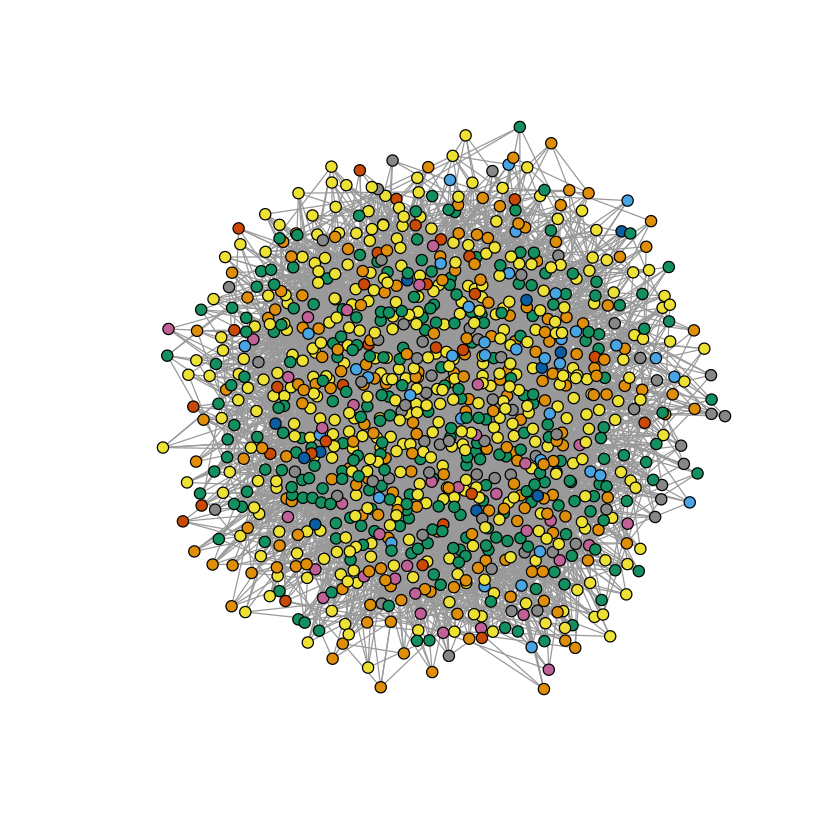

In [64]:
fc <- cluster_fast_greedy(g)
membership(fc)
sizes(fc)
g.com <- fastgreedy.community(g)
V(g)$color <- g.com$membership + 1
#print(length(g.com))
plot(fc,g,vertex.size=4,vertex.label.cex=0.01)
plot(g,vertex.size=4,vertex.label.cex=0.01)


### E  You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

[1] 56
$continuous
[1] TRUE

$alpha
[1] 1.694194

$xmin
[1] 0.0021

$logLik
[1] 134.4118

$KS.stat
[1] 0.08684026

$KS.p
[1] 0.9166129



Warning message in xy.coords(x, y, xlabel, ylabel, log):
“211 y values <= 0 omitted from logarithmic plot”

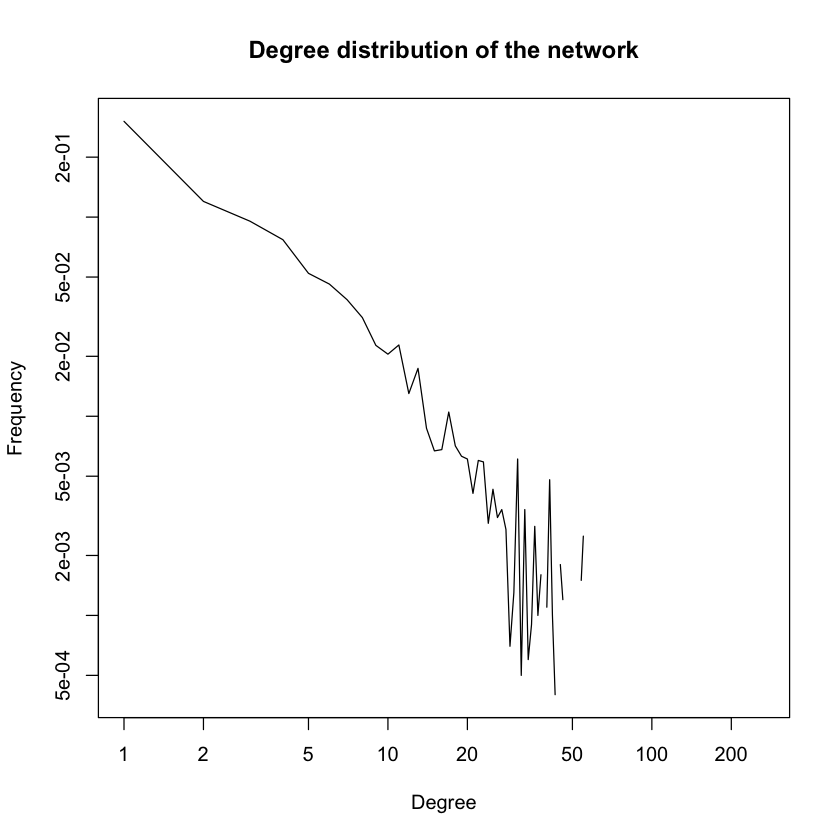

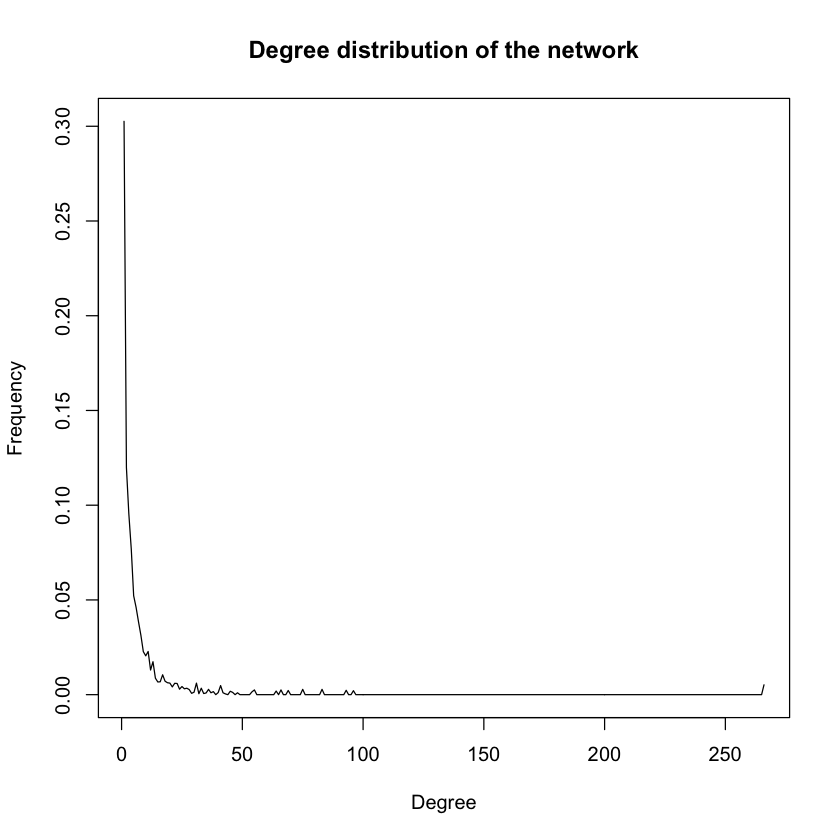

In [84]:
gsize = 10000
g = barabasi.game(gsize, m=2, directed=F)
degreesVector <- degree(g)
degreel = c()
for (v in sample(1:10000,10000, replace= TRUE)){
    neighs = neighbors(g,v)
    degree_ = 0
    if(length(neighs)>0){
        neigh2 = sample(neighs,1)
        degree_ = degree(g,neigh2)
    }
    degreel = c(degreel, degree_)
    
}
print(length(unique(degreel)))
h <- hist(degreel, plot=F, breaks=max(degreel)-min(degreel)+1)
print(fit_power_law(h$counts/10000))
plot(h$counts/10000,main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency",log='xy')
plot(h$counts/10000,main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")


In [76]:
fit_power_law(h$counts)

$continuous
[1] FALSE

$alpha
[1] 1.826319

$xmin
[1] 15

$logLik
[1] -416.1108

$KS.stat
[1] 0.05373088

$KS.p
[1] 0.9718998

### F Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot

In [66]:
deg_dst_age <- function(mval){
    set.seed(12345)
    gsize =1000
    dg_sum = rep(0,gsize)
    modu = 0
    for(i in c(1:1000)){
       g = barabasi.game(gsize, m=mval, directed=F)
       dg_sum = dg_sum + degree(g)
        
    }
    fg <- fastgreedy.community(g)
    cat("Expected modularity :",modularity(fg)/1000,"\n")
    plot(rev(dg_sum/1000), main=paste("Degree Vs Age m=",mval),xlab="Age",ylab="Degree",log='xy')
    plot(rev(dg_sum/1000),main=paste("Degree Vs Age m=",mval),xlab="Age",ylab="Degree",log='xy', type='l')
}

Expected modularity : 0.0009313648 


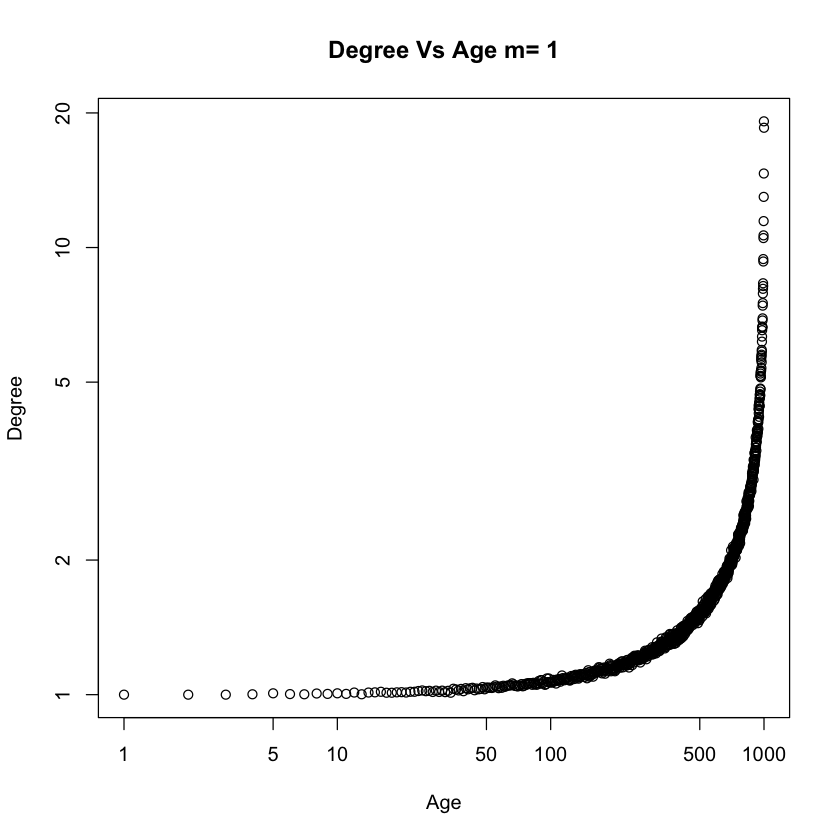

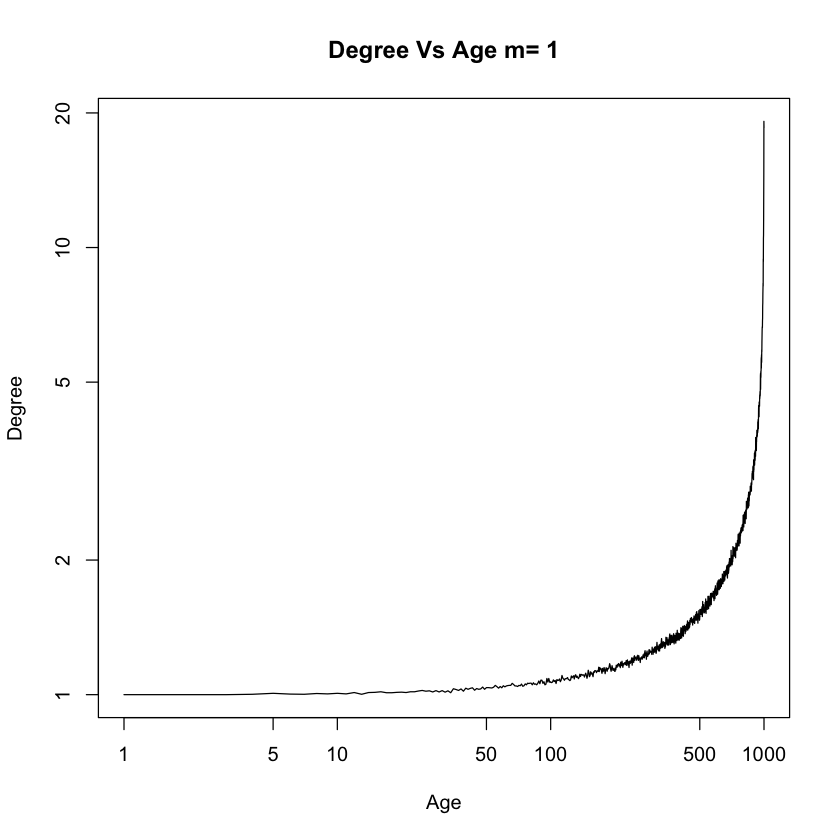

In [67]:
deg_dst_age(1)

Expected modularity : 0.0005326491 


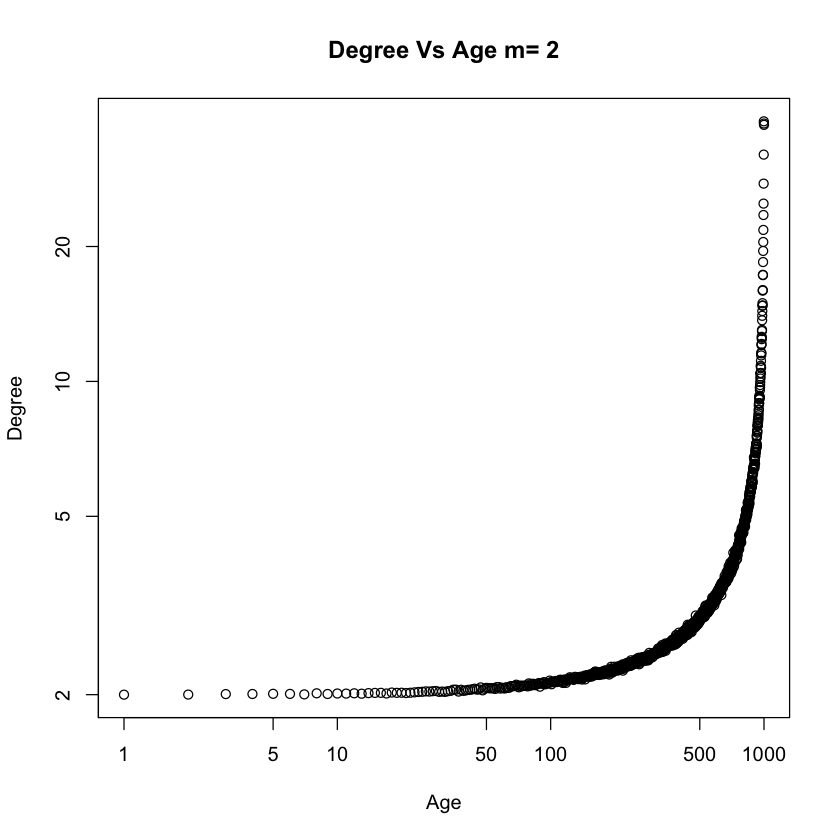

Expected modularity : 0.0002758356 


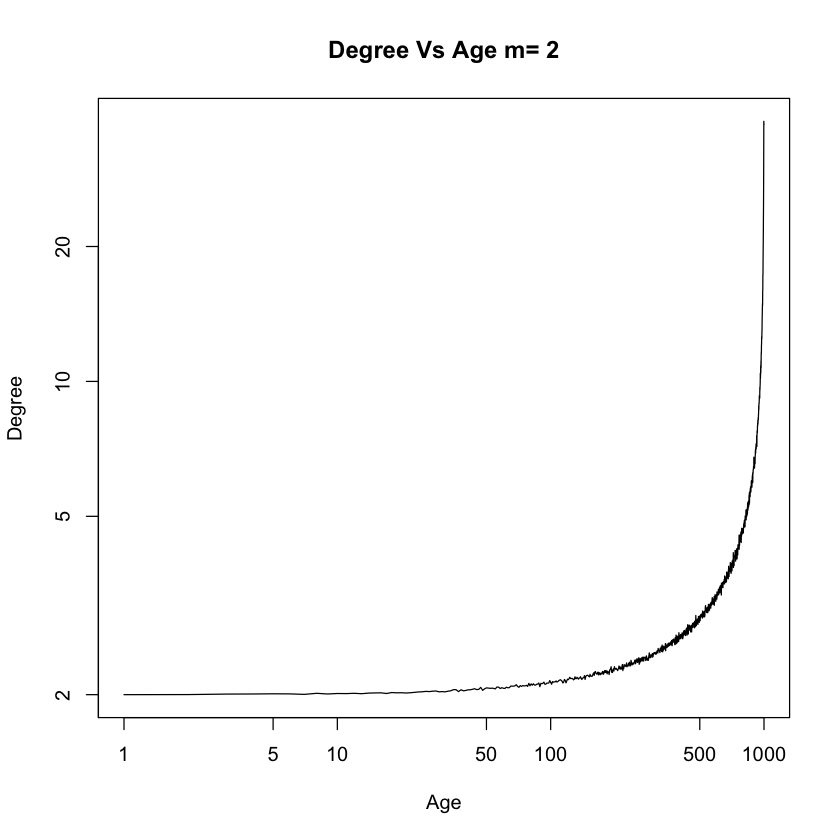

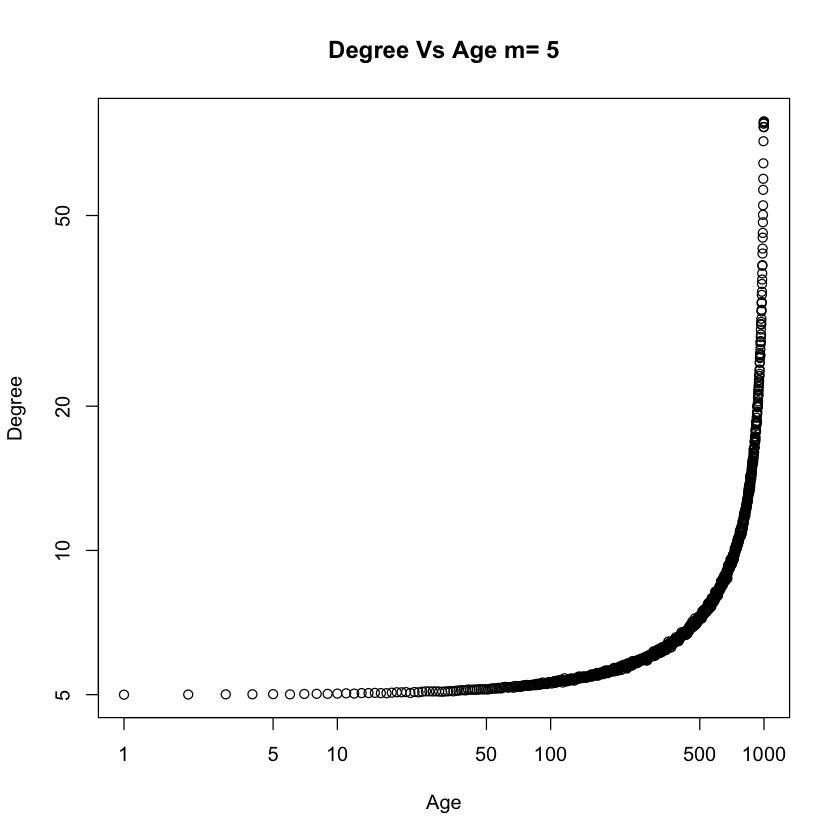

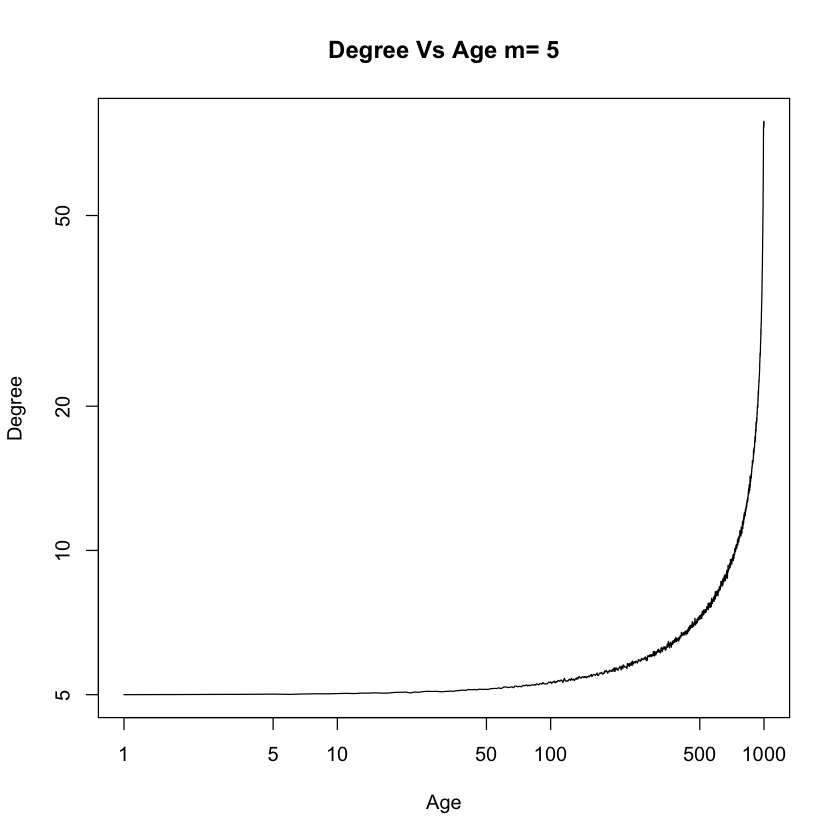

In [68]:
deg_dst_age(2)
deg_dst_age(5)

### G Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new net- work with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two pro- cedures for creating random power-law networks.

In [69]:
set.seed(12345)
g = barabasi.game(1000, m=mval, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)


[1] 0.2772562

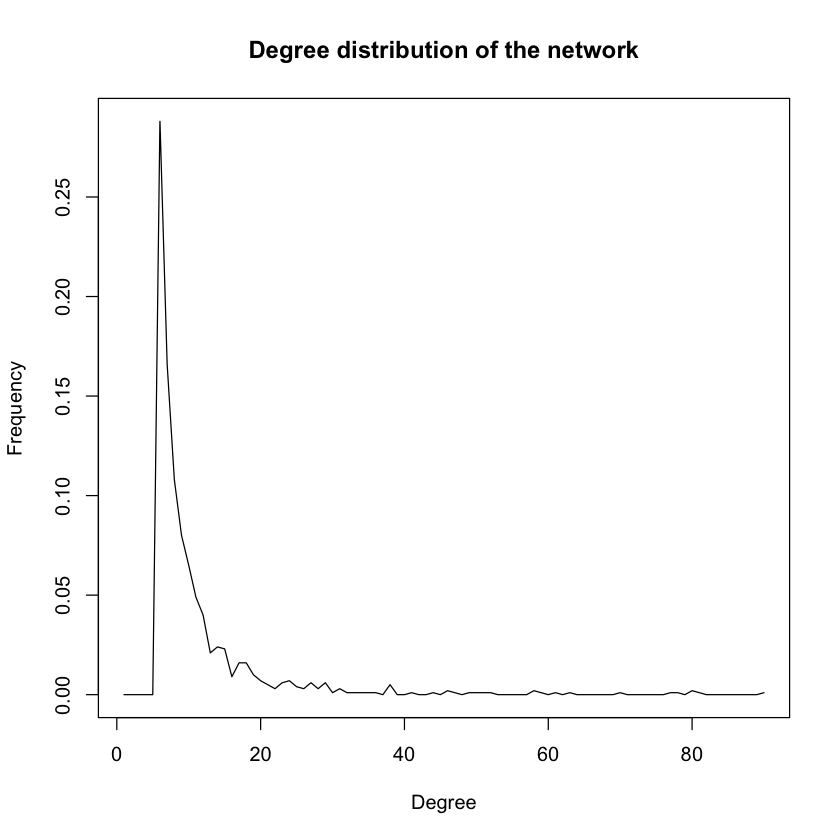

In [70]:
g2 = degree.sequence.game(degree(g),method =c("simple.no.multiple"))
plot(degree.distribution(g2),main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")

[1] 9


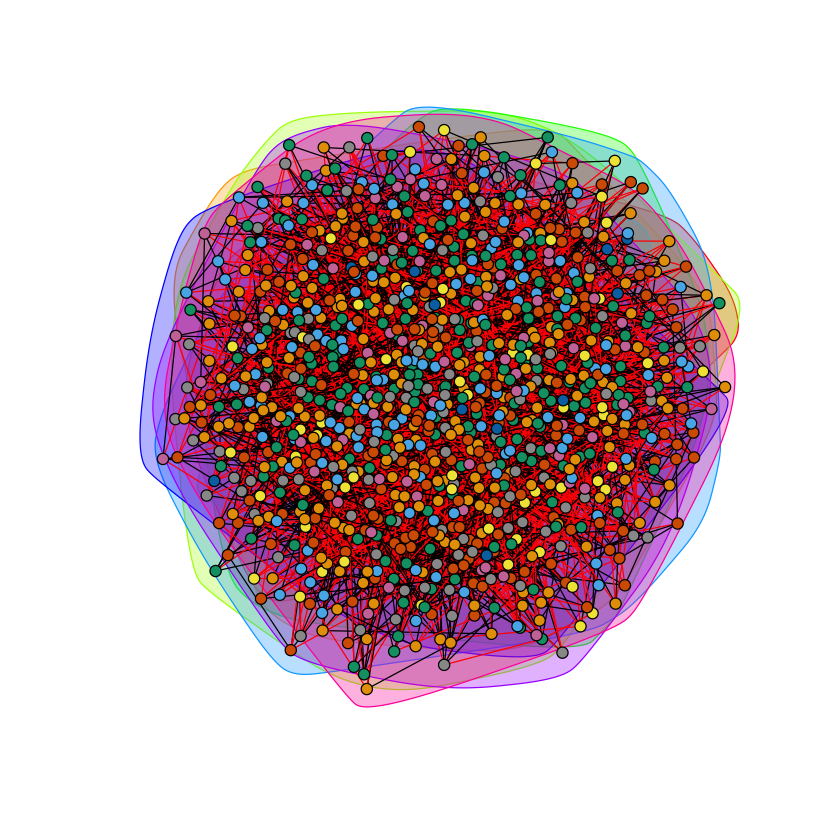

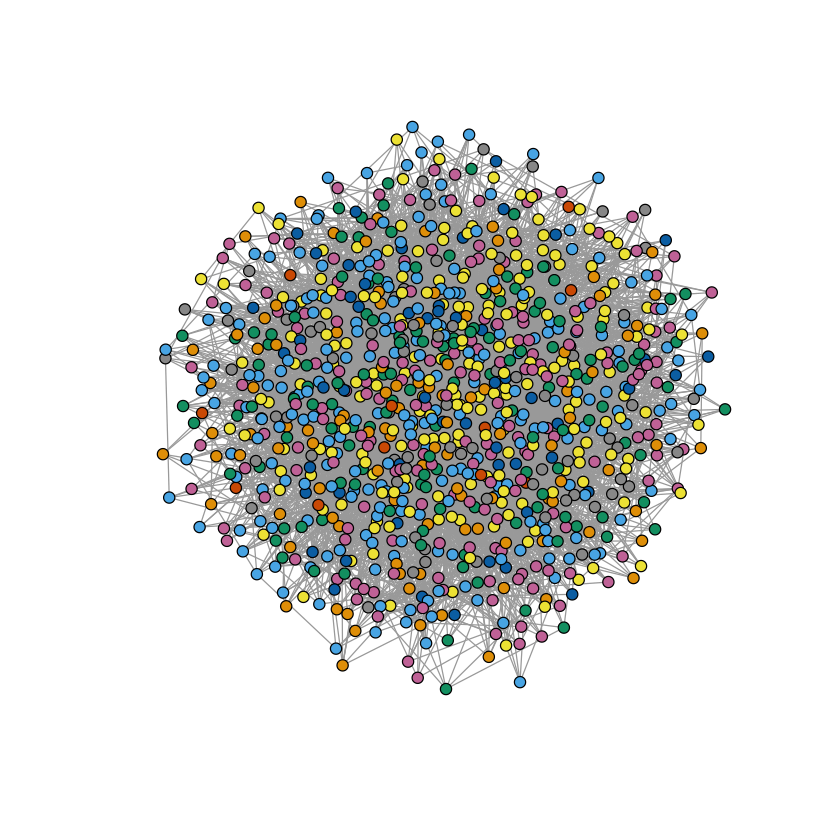

In [71]:
g.com <- fastgreedy.community(g)
V(g)$color <- g.com$membership + 1
c1 = cluster_fast_greedy(g)
print(length(g.com))
plot(c1,g,vertex.size=4,vertex.label.cex=0.01)
plot(g,vertex.size=4,vertex.label.cex=0.01)


[1] 12


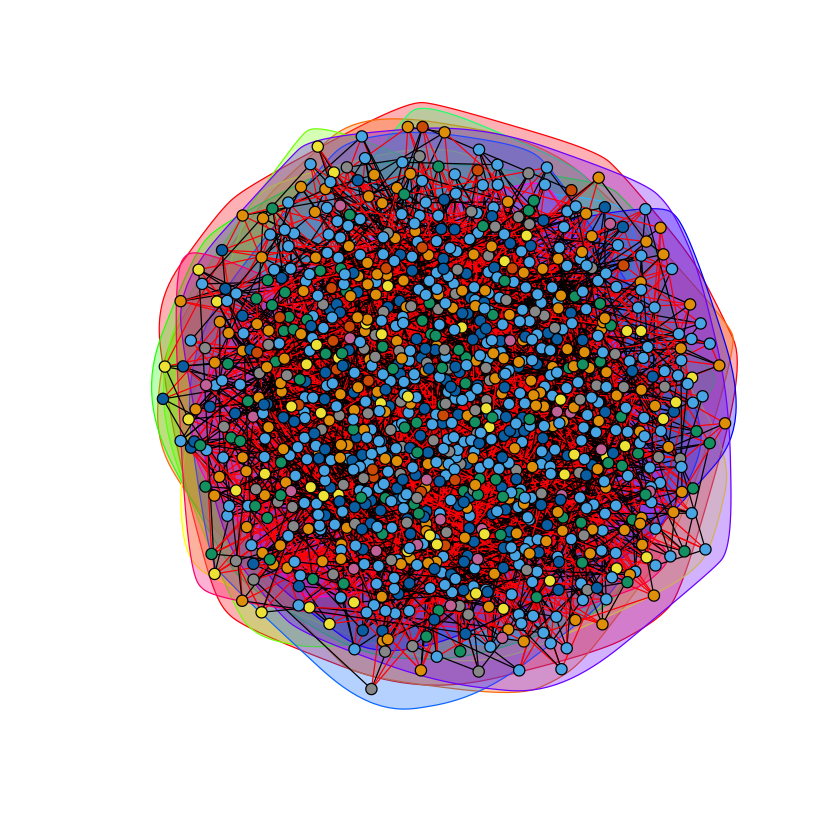

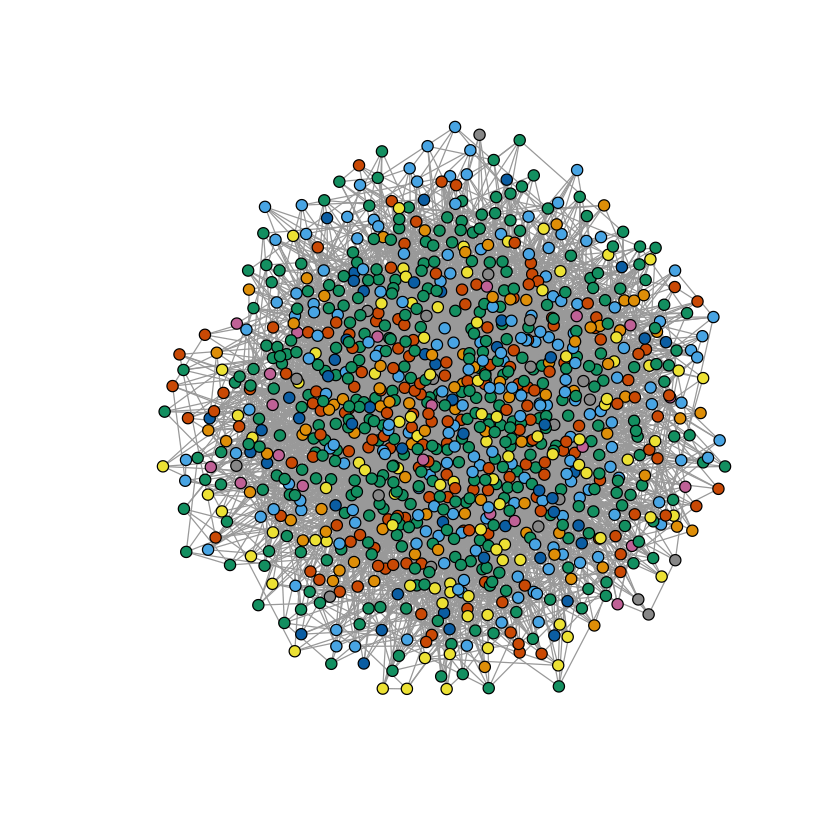

In [72]:
g2.com <- fastgreedy.community(g2)
c1 = cluster_fast_greedy(g2)
V(g2)$color <- g2.com$membership + 1
print(length(g2.com))
plot(c1,g2,vertex.size=4,vertex.label.cex=0.01)
plot(g2,vertex.size=4,vertex.label.cex=0.01)
